<a href="https://www.kaggle.com/lakshmanarajak/yoga-pose-classifier?scriptVersionId=89123897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
     for filename in filenames:
         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
!pip install -Uqq fastbook #Installing Fastbook - Fast AI notebook

In [28]:
 #Import all necessary libraries
    
from fastbook import *
import fastbook
# from fastai import * 
# from fastai.imports import *
from fastai.vision.widgets import * 

In [29]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True #To avoid truncation error on damaged files

In [30]:
#Creating a Data Block with Image as i/p and Category as O/P for classifier

yoga = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  #Independent variable is image and Dependent is category
    get_items=get_image_files, # Getting all Image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Train and Validation split
    get_y=parent_label, # 
    item_tfms=Resize(128)) # Resize Transformation

In [31]:
#Importing all image files to train the model

path = '../input/yoga-dataset/DATASET/TRAIN' #Path('DATASET/TRAIN')
Path.BASE_PATH = path
fns = get_image_files(path)
fns #All list of files used to train the model

(#752) [Path('Side Plank/00000325.jpg'),Path('Side Plank/00000253.jpg'),Path('Side Plank/00000199.JPG'),Path('Side Plank/00000408.jpg'),Path('Side Plank/00000228.jpg'),Path('Side Plank/00000332.jpg'),Path('Side Plank/00000215.jpg'),Path('Side Plank/00000296.jpg'),Path('Side Plank/00000414.jpg'),Path('Side Plank/00000348.jpg')...]

In [32]:
#Dataload object initialization - Fast AI

dls = yoga.dataloaders(path) #Data Loader object

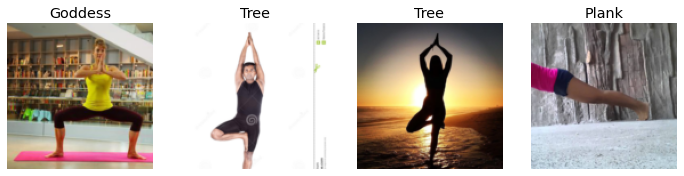

In [33]:
#To visualize files imported

dls.train.show_batch(max_n=4, nrows=1) #Samples from training set

In [34]:
#Doing necessary transformations on the input files

yoga = yoga.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5)) #Resizing images to 224*224
    ##batch_tfms=aug_transforms()) #Doing Augment Transformations
dls = yoga.dataloaders(path) #Re initialising Data Loaders

In [35]:
learn = cnn_learner(dls, resnet18, metrics=error_rate) # CNN learner - Transfer Learning
learn.fine_tune(4) # Fiting the model in Transfer learning 

epoch,train_loss,valid_loss,error_rate,time
0,2.487044,0.902576,0.320000,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.908655,0.467337,0.186667,00:16
1,0.639590,0.278033,0.073333,00:16
2,0.452802,0.232005,0.073333,00:15
3,0.344217,0.227041,0.073333,00:16


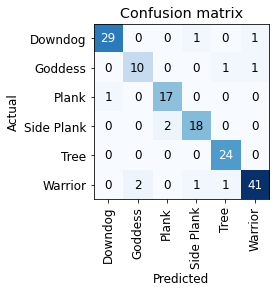

In [36]:
interp = ClassificationInterpretation.from_learner(learn) #Metrics
interp.plot_confusion_matrix() #To visualize errored images

In [37]:
#Cleaning up DataSet using performance metrics

#interp.plot_top_losses(5, nrows=1)

In [38]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
#hide
#for idx in cleaner.delete(): 
    #cleaner.fns[idx].unlink()
 #   print(cleaner.fns[idx])
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat

In [40]:
learn.export() #Export the model to package

In [41]:

path = Path()
path.ls(file_exts='.pkl') #Path of the package

(#1) [Path('export.pkl')]

In [42]:
learn_inf = load_learner(path/'export.pkl') #Using the package for testing 

In [43]:
learn_inf.dls.vocab

['Downdog', 'Goddess', 'Plank', 'Side Plank', 'Tree', 'Warrior']

('Goddess', tensor(1), tensor([0.0022, 0.6922, 0.0678, 0.0320, 0.0220, 0.1839]))


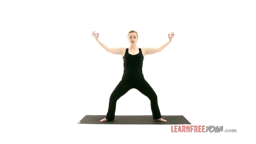

In [44]:
#Testing Goddess Pose
dest = '../input/yoga-dataset/DATASET/TEST/Goddess/00000029.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)



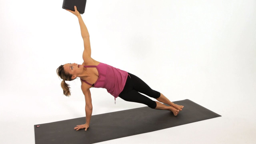

In [45]:
#Testing Side plank
dest = '../input/yoga-dataset/DATASET/TEST/Side Plank/00000015.jpg'
learn_inf.predict(dest)
im = Image.open(dest)
im.to_thumb(256,256)

('Tree', tensor(4), tensor([9.9185e-04, 4.3329e-03, 4.9398e-04, 1.1398e-02, 9.6773e-01, 1.5054e-02]))


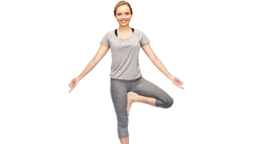

In [46]:
#Testing Tree Pose

dest = '../input/yoga-dataset/DATASET/TEST/Tree/00000017.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)

('Plank', tensor(2), tensor([6.1996e-04, 1.8724e-05, 7.9777e-01, 1.9943e-01, 1.3253e-05, 2.1445e-03]))


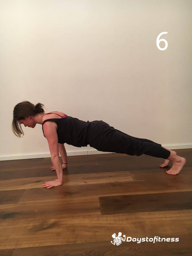

In [47]:
#Testing Plank Pose

dest = '../input/yoga-dataset/DATASET/TEST/Plank/00000017.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)

('Downdog', tensor(0), tensor([1.0000e+00, 1.8528e-08, 1.6054e-06, 2.0934e-06, 7.6691e-07, 2.0141e-08]))


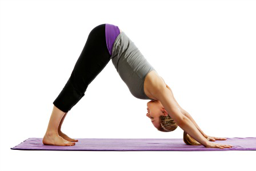

In [48]:
#Testing Downdog
dest = '../input/yoga-dataset/DATASET/TEST/Downdog/00000020.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)